In [1]:
"""
Read Open IFS data
based on rscamV2.ipynb (from SCAM Tutorial Docker Container)
Andrew Gettelman  September 2019
"""

'\nRead Open IFS data\nbased on rscamV2.ipynb (from SCAM Tutorial Docker Container)\nAndrew Gettelman  September 2019\n'

In [2]:
# Packages
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'png')
import seaborn as sns

### Locate and define the cases to plot

In [3]:
Machine='/glade/campaign/cgd/amp/andrew/'

#pth='/perm/rd/vsag/scm/41r1/scm-mg/scm-run/' #ECMWF Systems
pth=Machine+'ecmwf/cases/'  #Home Mac

# Select IOP and timestep (I have run MICRE = 90days and MICRE10d = first 10 days). 
iop='MICRE'

tstxt='225'

#Array of cases to plot Sensitivity
#pre='mg3v46_s14'
#runtx  =['in5', 'in1' ,'in10' ,'in5_ncnst','in5_nomey','in5_inucrh','in5_evapsed',
#         'in5_rainfrz'  ,'in5_sed','in5_rfall'    ,'in5_evap','in5_nograu2','in5_sb2001','in5_pfincld']#,'in5_ifsAcAu']
#casenm =['Base','IN=1','IN=10','N=const'  ,'No Meyers','Ice Nuc RH','Evap Sed',
#         'Rain Frz -40C','Sed'    ,'No Rfall Corr','Orig Evap','No Graupel','SB2001','PrecFrac-InCld']#,'IFS AcAu']

#pre='mg3v46_s17in5'
#runtx=['','_ncnst','_ns0.1','_ns10','_ng0.1','_ng10','_eci1','_niact10','_niact0.1']
#casenm=['Base','N-const','Ns*0.1','Ns*10','Ng*0.1','Ng*10','ECI=1','Ni*10','Ni/10']

pre='mg3v46_'
runtx=['s22in5','s22in5_Ac3Au1.5','s22in5_vfall','s22in5_exfall',
       's22in5_exoldfall','s22in5_oldevap','s22in5_Ncnst','s22in5_nomey','s22in1',
       's22in25','s22in5_ccn4e4','s22in5_ccn0.25e4','s22in5_pfrac','s22in5_rainfrz',
       's22in5_inucRH','s22in5_ifsKK','s22in5_accre','s22in5_cam6','s22in5_nograu']
casenm=['MG3 Base','Ac3Au1.5','Fallspeed','Explicit Fall',
        'Old Fallspeed','Old Evap','N=cnst','No Meyers','In/5',
        'IN*5','CCN*4','CCN/4','Precip Frac','Rain Freeze',
        'RH for IN','IFS KK','Au in Ac','MG3 CAM6','No Graupel']

ts= [tstxt for i in range(len(runtx))]
#ts[1]='225'

# Number sensitivity
#runt  =['', 'Nc10' ,'Nc100' ,'Ni0.01','Ni0.5','Nr2','Nr0.02']
#runtx = ['in5_ncnst'+runt[i] for i in range(len(runt))]
#casenm =['Nc50,Ni50','Nc10','Nc100','Ni10'  ,'Ni500','Nr2','Nr0.02']
#ts= ['900' for i in range(len(runtx))]

trlx='_T8rlx'

nr=len(runtx)

for i in range(nr):
  runtx[i]=pre+runtx[i]+trlx
#runtx[14]='mg3v46_s15'+runtx[14]

# Case
cases=[iop+'_'+runtx[i]+'_'+ts[i]+'s' for i in range(nr)]
casepth=[pth+'scmout_'+cases[i]+'/' for i in range(nr)]

In [4]:
#runtx

In [5]:
#IFS Case...
#ifspth=pth+'scmout_'+iop+'_refifs_diag_'+ts[i]+'s/'
ifspth=pth+'scmout_'+iop+'_refifsbudget2'+trlx+'_'+ts[i]+'s/'

In [6]:
# IFS Variables
ftype='progvar'

if (ftype=='progvar'):
    varn=   ['t','relative_humidity','cloud_fraction',
            'ql','qr','qi','qsn','qg',
            'numl','numi','numr','nums','numg',
            'ql','qsn','qptot']
    vartx=['Temp','Rel Hum','Cloud Frac',
            'Cld Liq' ,'Rain','Cld Ice','Snow','Graupel',
            'Num Liq','Num Ice','Num Rain','Num Snow','Num Grau',
            'SLW (T<0C)','Tot Ice','Tot Prec']
    varu=   [    1.,     100.,          1.,    
            1.e3,1.e3,1.e3,1.e3,1.e3, 
            1.e-6,1.e-3,1.e-6,1.e-3,1.e-3,
            1.e3, 1.e3,1.e3] 
#    varut=  [   'K',      '%',      'Frac',    
#            'g/kg','g/kg','g/kg','g/kg','g/kg',
#            '#/cm3','#/L','#/cm3','#/L','#/L',
#            'g/kg','g/kg','g/kg']
    varut=  [   'K',      '%',      'Frac',    
            r'g kg$^{-1}$',r'g kg$^{-1}$','g kg$^{-1}$','g kg$^{-1}$','g kg$^{-1}$',
            '# cm$^{-3}$','# L$^{-1}$','# cm$^{-3}$','# L$^{-1}$','# L$^{-1}$',
            'g kg$^{-1}$','g kg$^{-1}$','g kg$^{-1}$']



#MG Variables
if (ftype=='MG_tend'):   
    varn=['PRAO','PRCO','QCRESO','QRSEDTEN','QCSEDTEN',
          'MNUCCCO','MNUCCTO','BERGO',
          'MELTO','HOMOO','MSACWIO','PSACWSO','BERGSO',
          'QMULTG','PSACWG','PGSACW','QITEN','QISEVAP','QIRESO',
          'PRCIO','PRAIO','PRACSO','MMUCCRO','QMULTRGO','PRACGO',
          'PGRACSO','QSSEDTEN','EVAPSNOW','QCSEVAP','CMEIOUT','MELTGTOT']
    nv=len(varn)
    vartx= [varn[i] for i in range(nv)]
    vartx[24]='Coll Qr>Qg'
    vartx[30]='Melt Qg'
    varut = ['kg/kg/s' for i in range(nv)]
#    varut =['kg/kg/s']*nv
    varu = np.full(nv,1.)

### Read a multi level field

Make a big array of all the cases: progvar...
Manual plotting to deal with the pressure field....
Add slw and totice to variables...

In [7]:
datasets = []
mgdatasets =[]
mgzvar='REFL'
for r in range(nr):
#read data
    ds1 = xr.open_dataset(casepth[r]+ftype+'.nc',decode_times=False)

    if r==0:
        press=ds1['pressure_f'].mean(dim='time')
        pressh=ds1['pressure_h'].mean(dim='time')
        height=ds1['height_f'].mean(dim='time')

# Make new variables...
#slw....
    ds1['slw']=ds1.ql
    ds1.slw.values=np.where(ds1['t']<273.15,ds1.ql,0.)
#Tot ice
    ds1['qitot']=ds1.qsn+ds1.qi
#Tot precip
    ds1['qptot']=ds1.qsn+ds1.qr
    datasets.append(ds1[varn])
    del ds1
    
#Read MG tendencies
    mg1 = xr.open_dataset(casepth[r]+'MG_tend.nc',decode_times=False)
    mgdatasets.append(mg1[mgzvar])
    del mg1

#contatenate
dsall = xr.concat(datasets, dim='runs')
mgall = xr.concat(mgdatasets, dim='runs')
#add a coordinate for the ensemble dimension
dsall=dsall.assign_coords(runs=casenm)
mgall=mgall.assign_coords(runs=casenm)
del datasets,mgdatasets

KeyboardInterrupt: 

In [ ]:
#Read an IFS case...
dsifs = xr.open_dataset(ifspth+ftype+'.nc',decode_times=False)
# Make new variables...
#slw....
dsifs['slw']=dsifs.ql
dsifs.slw.values=np.where(dsifs['t']<273.15,dsifs.ql,0.)
#Tot ice
dsifs['qitot']=dsifs.qsn+dsifs.qi
#Tot precip
dsifs['qptot']=dsifs.qsn+dsifs.qr

In [ ]:
## Now do some time work...
#Separate variable
td=dsall.time.values.astype('float')/86400.

In [ ]:
#print(dsall.attrs['start_day'])
#dsall.time.attrs['units']='seconds since 2017-01-01'
#dsall=xr.decode_cf(dsall)
#mgall.time.attrs['units']='seconds since 2017-01-01'
#mgall=xr.decode_cf(mgall)
#dsifs.time.attrs['units']='seconds since 2017-01-01'
#dsifs=xr.decode_cf(dsifs)

### Vertical Averages

In [ ]:
lbl=['A','B','C','D','E','F','G','H']
cls=['black','dodgerblue','cyan','green','lightgreen','goldenrod','coral','orange','maroon',
     'tan','indigo','brown','silver','rosybrown','olivedrab','hotpink','darkkhaki','slateblue','plum']
ls=['solid','dotted','dashed','dashdot','solid','dotted','dashed','dashdot','solid','dotted','dashed','dashdot','solid','dotted','dashed','dashdot','solid','dotted','dashed','dashdot']

In [ ]:
len(cls)

In [ ]:
sns.set_context("talk")  #paper, talk, poster

fig,axs=plt.subplots(nrows=2,ncols=3,sharey=True,gridspec_kw={'wspace':0},
                    figsize=[20,12])
#fig.tight_layout()
yrg=[1000.,100.]
axs[0,0].set_ylim(yrg)
axs[0,0].set_ylabel('Pressure [hPa]')

# MG and ifs.

vv=[13,14,15]
nv=len(vv)

for v in range(nv):
    axs[0,v].set_title(lbl[v]+') '+vartx[vv[v]]+' ')
    axs[0,v].set_xlabel(varn[vv[v]]+' '+varut[vv[v]])
    v1=dsall[varn[vv[v]]]
    v2=dsifs[varn[vv[v]]]
#only in cloud points? or all points?     
#    v1m=v1[gg,:].mean(dim='time')
#    v2m=v2[gg,:].mean(dim='time')
#all points    
    v1m=v1.mean(dim='time')*varu[vv[v]]
    v1s=v1.std(dim='time')*varu[vv[v]]
    v2m=v2.mean(dim='time')*varu[vv[v]]
    v2s=v2.std(dim='time')*varu[vv[v]]
    for r in range(nr):
        axs[0,v].plot(v1m.isel(runs=r),press/100.,label=casenm[r],color=cls[r],linestyle=ls[r])
    
#    axs[0,v].fill_betweenx(press/100.,(v1m-v1s),(v1m+v1s),alpha=0.3)
    xrg=[v1m.min(),v1m.max()]
    axs[0,v].set_xlim(xrg)
#overplot ifs...
    axs[0,v].plot(v2m,press/100.,label='IFS',linestyle='solid',color='red')
    
vv2=[8,9]
for v in range(2):
    axs[1,v].set_title(lbl[v+3]+') '+vartx[vv2[v]]+' ')
    axs[1,v].set_xlabel(varn[vv2[v]]+' '+varut[vv2[v]])
    v1=dsall[varn[vv2[v]]]
#only in cloud points? or all points?     
#    v1m=v1[gg,:].mean(dim='time')
#all points    
    v1m=v1.mean(dim='time')*varu[vv2[v]]
    v1s=v1.std(dim='time')*varu[vv2[v]]
    for r in range(nr):
        axs[1,v].plot(v1m.isel(runs=r),press/100.,label=casenm[r],color=cls[r],linestyle=ls[r])
 
# Turn off panel
axs[1,2].axis('off')

##Reflectivity. 
##Set missing to NaN
#mgall=mgall.where(mgall > -999.)
#reflm=mgall.mean(dim='time')

##reflm=m1M

#axs[1,2].set_title(lbl[5]+') '+'Reflectivity')
#axs[1,2].set_xlabel('Reflectivity (dBz)')
#for r in range(nr):
#    axs[1,2].plot(reflm.isel(runs=r),press/100.,label=casenm[r],color=cls[r],linestyle=ls[r])
#xrg=[-40.,reflm.max()]
#axs[1,2].set_xlim(xrg)
    
plt.subplots_adjust(hspace=0.3)
    
#axs[0,2].legend(fontsize=10,ncol=2)


# Put legend in empty subplot...
axs[1,2].set_frame_on(False)
axs[1,2].get_xaxis().set_visible(False)
axs[1,2].get_yaxis().set_visible(False)
for r in range(nr):
    axs[1,2].plot(0,0,label=casenm[r],color=cls[r],linestyle=ls[r])
axs[1,2].plot(0,0,label='IFS',linestyle='solid',color='red')
axs[1,2].legend(fontsize=16,ncol=2)

savfig=False
if savfig:
    plt.savefig('s22new_sens5_vert_'+iop+tstxt+'s.pdf')

In [13]:
### Some work on reflectivity
#1. Threshold 
#2 average in Z.
#add height dependent threshold
hthreshold=20.*np.log10(height/1000.)-37.5
nz=len(height)

mgallT=mgall.copy()

# Add height dependent threshold
for r in range(nr):
    for z in range(nz):
       mgallT[r,:,z]=mgallT[r,:,z].where(mgallT[r,:,z] > hthreshold[z])


In [14]:
## Now try averaging in Z...and applying threshold
tmp=mgallT.copy()
tmp2=tmp.where(tmp > -40.)
tmp3=tmp2.where(tmp2 < 25.)
tmpz=10**(tmp3/10.)

mgallZ=tmpz

# now take mean and convert back to dBz

mgallZm=mgallZ.mean(dim='time')
m1M=10.*np.log10(mgallZm)

### Time averages single level plots, multiple fields 
(code from socrates_sens_avg)

In [15]:
#Read an IFS case...
ifsdiag = xr.open_dataset(ifspth+'diagvar.nc',decode_times=False)

In [16]:
#ifsdiag

dvarn=['liq_wat_path','ice_wat_path','total_cloud','low_cloud','middle_cloud',
       'high_cloud','stra_rain','sfc_swrad_down','sfc_lwrad_down']
dvart=['Liquid Water Path','Ice Water Path','Total Cloud','Low Cloud','Mid level Cloud',
       'High Cloud','Stratiform Rain','Surf SW Downward Radiation','Surface LW Downward Radiation']
dvarscl=[1000.,1000.,1.,1.,1.,1.,86400.,1.,1.]
dvaru=['g/kg','g/kg','Frac','Frac','Frac','Frac','mm/d','Wm-2','Wm-2']

In [17]:
# Read diagnostics....MG and IFS
datasets = []
for r in range(nr):
#read data
    ds1 = xr.open_dataset(casepth[r]+'diagvar.nc',decode_times=False)
    datasets.append(ds1[dvarn])
    del ds1

#contatenate
dsdiag = xr.concat(datasets, dim='runs')
#add a coordinate for the ensemble dimension
dsdiag=dsdiag.assign_coords(runs=casenm)

del datasets

In [19]:
### Read Observations

cldversion='V1.95'
Machine='/glade/campaign/cgd/amp/andrew/'
opth=Machine+'/ecmwf/MICRE_data/Cloud_and_Precipitation_Properties/'+cldversion+'/' #Andrew's Mac

#LWP
#Microwave LWP
olwpvar='MWR_RETRIEVAL_liquid_water_path'
olwptime='MWR_RETRIEVAL_time_gmt'
fspec='Cloud_and_Precipitation_Properties_MICRE_'+cldversion+'_'
#read a variable, first file... 

#ds1 = xr.open_dataset(opth+fspec+d0+'.nc',decode_times=False)
#
#var1=ds1[olwpvar]
#var1time=ds1[olwptime]
##reset date (hours since 2017-01-01)
#var1time.attrs['units']='hours since 2017-01-01'

import glob
fn = sorted(glob.glob(opth+fspec+'*.nc'))

time_spec='hours since 2017-01-01'

#loop for days (or can I just read an array of strings?)
new_datasets = []
for d in np.arange(76):
    dy=d
    dsn = xr.open_dataset(fn[dy],decode_times=False)
#    print(dsn)
    if olwpvar in dsn.data_vars:
        new_ds = xr.Dataset()
        var1n=dsn[olwpvar]
        var1ntime=dsn[olwptime]+24.*dy
    #reset date (hours since 2017-01-01)
#        var1ntime.attrs['units']='hours since 2017-01-01'
        new_ds['time'] = xr.IndexVariable(['time'], var1ntime)
        new_ds.time.attrs['units']=time_spec
        new_ds[olwpvar]= xr.Variable(['time'], var1n)
           
        new_datasets.append(new_ds)

# now merge

MWR_lwp=xr.decode_cf(xr.concat(new_datasets,'time'))

#Radiation

opth=Machine+'ecmwf/MICRE_data/Cloud_and_Precipitation_Properties/V1.95/' #Andrew's Mac
fspec='Cloud_and_Precipitation_Properties_MICRE_V1.95_'

#Read surface radation (SURF_RAD...) and compare to ifs.
svars = ['shortwave_down_total','shortwave_up_total','longwave_up_total','longwave_down_total']
surfvars=[ 'SURF_RAD_' + s for s in svars]

nv=len(surfvars)

surftime='SURF_RAD_time_gmt'
 
import glob
fn = sorted(glob.glob(opth+fspec+'*.nc'))

nf=len(fn)
time_spec='hours since 2017-01-01'

#Somewhere here loop for arrays above.....would like to put all together into a big array (assume all times exist then fine...)

#loop for days 
new_datasets = []
for d in np.arange(nf):
    dy=d
    dsn = xr.open_dataset(fn[dy],decode_times=False)
#    print(dsn)
    if surfvars[2] in dsn.data_vars:
        new_ds = xr.Dataset()
        var1ntime=dsn[surftime]+24.*dy
    #reset date (hours since 2017-01-01)
#        var1ntime.attrs['units']='hours since 2017-01-01'
        new_ds['time'] = xr.IndexVariable(['time'], var1ntime)
        new_ds.time.attrs['units']=time_spec
#now loop for variables to select
        for v in np.arange(nv):
            var1n=dsn[surfvars[v]]
            new_ds[surfvars[v]]= xr.Variable(['time'], var1n)
           
        new_datasets.append(new_ds)

# now merge

SURFall=xr.decode_cf(xr.concat(new_datasets,'time'))
#SURFall[surfvars[2]].values.max()

#Hourly average
SURFhvar=SURFall.resample(time='1H').mean()

In [20]:
# Take means

olwp_mean=124. #MWR_lwp.MWR_RETRIEVAL_liquid_water_path.mean(dim='time')
orad_mean=SURFall.mean(dim='time')

In [21]:
#box=axs[0].get_position()
#box.width

In [22]:
### Get Time Mean observations....
dvarn

['liq_wat_path',
 'ice_wat_path',
 'total_cloud',
 'low_cloud',
 'middle_cloud',
 'high_cloud',
 'stra_rain',
 'sfc_swrad_down',
 'sfc_lwrad_down']

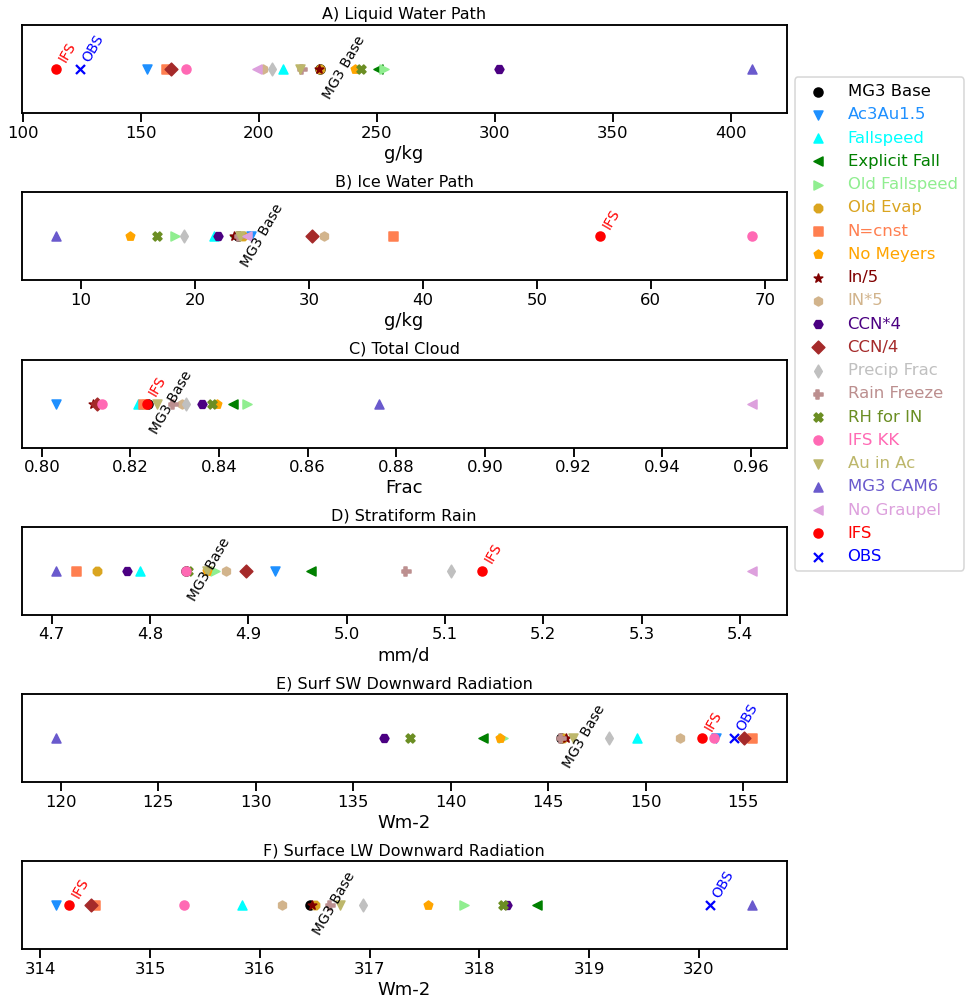

In [23]:
#Fancier plots
plt.rcParams['figure.figsize'] = [17, 17]
ofs=0.
txofs=-0.04
rot=60

mark=['o','v','^','<','>','8','s','p','*','h','H','D','d','P','X','o','v','^','<']

#This is an 'empirical' shift for each simulation (and variable)....
shift=np.full(nr,0.0)
#Result:

#select variables...
vv=[0,1,2,6,7,8]
nv=len(vv)

#hfont = {'fontname':'Helvetica'}

fig,axs=plt.subplots(nv)

for v in range(nv):
    
    #Logic to remove no graupel (nr-1) from radiation plots.
    if vv[v]==7 or vv[v]==8: 
        nn=nr-1
    else:
        nn=nr

#    if dvarn[vv[v]]=='sfc_swrad_down':
#        zeroSW=np.where(dsdiag[dvarn[vv[v]]] < 5.)[0]
#        dsdiag[dvarn[vv[v]]][zeroSW] = np.nan
#        mavg=dsdiag[dvarn[vv[v]]].mean(dim='time')*dvarscl[vv[v]]
#    else:
    mavg=dsdiag[dvarn[vv[v]]].mean(dim='time')*dvarscl[vv[v]]
        
    for r in range(nn):
        axs[v].scatter(mavg[r],ofs,marker=mark[r],color=cls[r],label=casenm[r])

#    axs[v].scatter(mavg[0:nn],np.zeros(nn)+ofs,marker='o',color=cls[0:nn])
        
#    for r in range(nn):
#        axs[v].text(mavg[r],txofs+ofs+0.003,casenm[r],fontsize=10,rotation=rot,color=cls[r])

    axs[v].set(xlabel=varu[v])

#Plot IFS
#    if dvarn[vv[v]]=='sfc_swrad_down':
#        zeroSW=np.where(ifsdiag[dvarn[vv[v]]] < 5.)[0]
#        ifsdiag[dvarn[vv[v]]][dict(time=zeroSW)] = np.nan
#        mifs=ifsdiag[dvarn[vv[v]]].mean(dim='time')*dvarscl[vv[v]]
#    else:
    mifs=ifsdiag[dvarn[vv[v]]].mean(dim='time')*dvarscl[vv[v]]
    
    axs[v].scatter(mifs,ofs,marker='o',color='red',label='IFS')
    axs[v].set_title(lbl[v]+') '+dvart[vv[v]],fontsize=16)
    axs[v].set_xlabel(dvaru[vv[v]])
    axs[v].axes.get_yaxis().set_ticks([])

    
## Add observations...
    if dvarn[vv[v]]=='liq_wat_path':
        axs[v].scatter(olwp_mean,ofs,marker='x',color='blue',label='OBS')
        axs[v].text(olwp_mean,ofs+0.01,'OBS',fontsize=14,rotation=rot,color='blue')
   
    if dvarn[vv[v]]=='sfc_swrad_down':
        tmp=orad_mean.SURF_RAD_shortwave_down_total
        axs[v].scatter(tmp,ofs,marker='x',color='blue',label='OBS')
        axs[v].text(tmp,ofs+0.01,'OBS',fontsize=14,rotation=rot,color='blue')

    if dvarn[vv[v]]=='sfc_lwrad_down':
        tmp=orad_mean.SURF_RAD_longwave_down_total
        axs[v].scatter(tmp,ofs,marker='x',color='blue',label='OBS')
        axs[v].text(tmp,ofs+0.01,'OBS',fontsize=14,rotation=rot,color='blue')
        
#Legend Outside the box 
    if v==0:
        leg = axs[v].legend(loc='upper left', bbox_to_anchor=(1, 0.5))

        for h, t in zip(leg.legendHandles, leg.get_texts()):
                        t.set_color(h.get_facecolor()[0])
                
# Label IFS and MG3 Base on All plots
    axs[v].text(mifs,ofs+0.01,'IFS',fontsize=14,rotation=rot,color='red')
    axs[v].text(mavg[0],txofs+ofs+0.003,casenm[0],fontsize=14,rotation=rot,color=cls[0])            
 
# Adjust bounding box to accomodate legend
fig.subplots_adjust(hspace=0.9,right=0.75)
#plt.show()
figsav=False
if figsav:
    plt.savefig('sens22new5_0d_'+iop+tstxt+'s.png')

In [55]:
#ifsdiag.time.attrs['units']='seconds since 2017-01-01'
#ifsdiag=xr.decode_cf(ifsdiag)
tmp=ifsdiag['sfc_swrad_down']


tmpday=tmp.groupby("time.hour").mean()
tmpday=tmpday.fillna(0.)
tmpday.mean()

#ifsdiag=ifsdiag.fillna(0.)

### Observations
Now see about reading some MICRE data from NetCDF files.
Note, time variable is non-standard: Hours since start of UTC date
So that means having to loop by day, reset time to beginning of day, then add/merge....
OR add sequential hours for each day (24 x index). Then append to previous..

In [ ]:
#Microwave LWP
olwpvar='MWR_RETRIEVAL_liquid_water_path'
olwptime='MWR_RETRIEVAL_time_gmt'
fspec='Cloud_and_Precipitation_Properties_MICRE_V1.51_'
#read a variable, first file... 

#ds1 = xr.open_dataset(opth+fspec+d0+'.nc',decode_times=False)
#
#var1=ds1[olwpvar]
#var1time=ds1[olwptime]
##reset date (hours since 2017-01-01)
#var1time.attrs['units']='hours since 2017-01-01'

import glob
fn = sorted(glob.glob(opth+fspec+'*.nc'))

time_spec='hours since 2017-01-01'

#loop for days (or can I just read an array of strings?)
new_datasets = []
for d in np.arange(76):
    dy=d
    dsn = xr.open_dataset(fn[dy],decode_times=False)
#    print(dsn)
    if olwpvar in dsn.data_vars:
        new_ds = xr.Dataset()
        var1n=dsn[olwpvar]
        var1ntime=dsn[olwptime]+24.*dy
    #reset date (hours since 2017-01-01)
#        var1ntime.attrs['units']='hours since 2017-01-01'
        new_ds['time'] = xr.IndexVariable(['time'], var1ntime)
        new_ds.time.attrs['units']=time_spec
        new_ds[olwpvar]= xr.Variable(['time'], var1n)
           
        new_datasets.append(new_ds)

# now merge

MWR_lwp=xr.decode_cf(xr.concat(new_datasets,'time'))
#MWR_lwp
#dsn

### Read model data for plotting versus obs

In [ ]:
#del ddiag1
#del ddiag2
print(casepth1)
dtmp = xr.open_dataset(casepth1+'diagvar.nc',decode_times=False)
dtmp.time.attrs['units']='seconds since 2017-01-01'
ddiag1=xr.decode_cf(dtmp)
dtmp2 = xr.open_dataset(casepth2+'diagvar.nc',decode_times=False)
dtmp2.time.attrs['units']='seconds since 2017-01-01'
ddiag2=xr.decode_cf(dtmp2)
mlwpvar='liq_wat_path'
mlwpscl=1000.

#get time variable.
#technically time= ds.dt.days should work, but this seems to be a bug in xarray... 
#or the issue is as below, there is no days since coordinate.....
#tmp=ds.time + 

th=ds1.time.values.astype('float')/3600.

#ddiag1

### Read SCAM data

In [ ]:
# Open files
#read data  (This I think is only on my mac right now)

#iopn='micre2017'
#scasen='scam6131_base_nudge3_mg3'


iopn='micre'
scasen='control'

tstart='2017-01-01-00000'

scamtx='CAM6'
scamcase=scasen+'.FSCAM.'+iopn
scamfn=pth+scamcase+'/'+scamcase+'.cam.h0.'+tstart+'.nc'

# Read data
dscamtmp = xr.open_dataset(scamfn,decode_times=False)

# Need to transform (devolve) the units. SCAM/CAM/CESM has a 'calendar' attribute, so CF picks it up
# Data does NOT have a calendar attribute, and cannot mix datetime and cf_calendar objects apparently. 
# Right way is probably to set all ifs and obs calendars to 'gregorian' when read, but oh well
dscamtmp.time.attrs['units']='days since 2017-01-01'
del dscamtmp.time.attrs['calendar']
dscam =xr.decode_cf(dscamtmp)
#dscam

In [ ]:
#Plot
sns.set_context("talk")

fig=plt.figure(figsize=(30, 10))

#Raw
#MWR_lwp[olwpvar].sel(time=slice('2017-01-01','2017-01-10')).plot(label='Raw')

tend='2017-03-17'

#Hourly average
hvar=MWR_lwp.resample(time='1H').mean()
hvar[olwpvar].sel(time=slice('2017-01-01',tend)).plot(label='Hourly OBS')


#model over this
tmp=ddiag1[mlwpvar]*mlwpscl
tmp.sel(time=slice('2017-01-01',tend)).plot(label=casetx1)

tmp2=ddiag2[mlwpvar]*mlwpscl
tmp2.sel(time=slice('2017-01-01',tend)).plot(label=casetx2)

# SCAM as well

stmp=dscam['TGCLDLWP']*mlwpscl
#print(stmp)
stmp.sel(time=slice('2017-01-01',tend)).plot(label=scamtx)
plt.legend()

plt.title('MICRE Liquid Water Path')
plt.ylabel('LWP (g/kg)')
plt.savefig('scm_micre_LWP.pdf')

In [ ]:
### Now read radar data....

In [ ]:
#Radar Data
zvar='RADAR_reflectivity_masked'
ztime='RADAR_time_gmt'
zalt='radar_height'
fspec='Cloud_and_Precipitation_Properties_MICRE_V1.51_'
#read a variable, first file... 

#ds1 = xr.open_dataset(opth+fspec+d0+'.nc',decode_times=False)
#
#var1=ds1[olwpvar]
#var1time=ds1[olwptime]
##reset date (hours since 2017-01-01)
#var1time.attrs['units']='hours since 2017-01-01'

import glob
fn = sorted(glob.glob(opth+fspec+'*.nc'))

time_spec='hours since 2017-01-01'

#loop for days (or can I just read an array of strings?)
new_datasets = []
for d in np.arange(76):
    dy=d
    dsn = xr.open_dataset(fn[dy],decode_times=False)
#    print(dsn)
    if olwpvar in dsn.data_vars:
        new_ds = xr.Dataset()
        var1n=dsn[zvar]
        var1ntime=dsn[ztime]+24.*dy
        var1alt=dsn[zalt]
    #reset date (hours since 2017-01-01)
#        var1ntime.attrs['units']='hours since 2017-01-01'
        new_ds['time'] = xr.IndexVariable(['time'], var1ntime)
        new_ds['radar_height'] = xr.IndexVariable(['radar_height'], var1alt)
        new_ds.time.attrs['units']=time_spec
        new_ds[zvar]= xr.Variable(['time','radar_height'], var1n)
           
        new_datasets.append(new_ds)

# now merge

RADAR_Z=xr.decode_cf(xr.concat(new_datasets,'time'))

In [ ]:
dsn.RADAR_height

### RADAR_Z

In [ ]:
#Plot
fig=plt.figure(figsize=(30, 10),dpi=200)

#Swap axes....

radt=RADAR_Z.transpose()
#Raw

#This works
radt[zvar].isel(time=slice(10000,60000)).plot(cmap='gist_ncar')

#This does not work
#radt[zvar].sel(time=slice('2017-01-01','2017-01-10')).plot(cmap='gist_ncar')
#radt[zvar].loc[dict(time=slice('2017-01-03', '2000-01-05'))].plot(cmap='gist_ncar')
#Try to plot cloud fraction over this? 
#plt.savefig('micre_dbz.png')
plt.title('Observed Reflectivity')

In [ ]:
# Fix contorl Levels
nl=80
dl=50/float(nl)
zlvs=np.arange(nl+1,dtype='float')-nl/2.
#dlvs

yrg=[0,14.]
trg=[3.5,10.2]

nt=len(radt.time)

flag = xr.DataArray(np.zeros(nt),dims=('time'),coords={'time': radt.time})

In [ ]:
# Radar times in days
tdays=radt.time.dt.day+radt.time.dt.hour/24.+radt.time.dt.minute/(24*60.)+radt.time.dt.second/(86400.)

#radt.sel(time=slice('2017-01-01','2017-01-10'))
#cs=plt.contourf(td,press/100.,mg1[mgzvar].transpose(),dlvs,cmap='gist_ncar')
#RADAR_Z[zvar].isel(time=slice(10000,60000)).transpose().plot(cmap='gist_ncar')

#cs=plt.contourf(radt.time.isel(time=slice(10000,30000)),dsn.RADAR_height/1000.,radt[zvar].isel(time=slice(10000,30000)),zlvs,cmap='gist_ncar')
#plt.ylim([0,15.])

#tdays=

smallT=radt.time.isel(time=slice(10000,65000))
smallZ=radt[zvar].isel(time=slice(10000,65000))

tdsmall=smallT.dt.day+smallT.dt.hour/24.+smallT.dt.minute/(24*60.)+smallT.dt.second/(86400.)
cs=plt.contourf(tdsmall,dsn.RADAR_height/1000.,smallZ,zlvs,cmap='gist_ncar')
cbar=plt.colorbar(cs)
cbar.ax.set_ylabel('Reflectivity')
plt.ylabel('Height (km)')
plt.xlabel('Time (days)')
plt.title('Observed Reflectivity')

plt.ylim(yrg)
plt.xlim(trg)

In [ ]:
# want to select times by day...why does this yield differences from above plot!

gg=np.where((tdays.values >= trg[0]) & (tdays.values <= trg[1]))[0]
#flag[gg]= 1.
#gf=np.where(flag ==1.)[0]
smallZ2=radt[zvar].isel(time=gg)   #same answer if use 'gf' here....
smallT2=tdays.isel(time=gg)

#smallZ=radt[zvar].isel(time=slice(10000,65000))
#smallT=tdays.isel(time=slice(10000,65000))

cs=plt.contourf(smallT2,dsn.RADAR_height/1000.,smallZ2,zlvs,cmap='gist_ncar')
cbar=plt.colorbar(cs)
cbar.ax.set_ylabel('Reflectivity')
plt.ylabel('Height (km)')
plt.xlabel('Time (days)')
plt.title('Observed Reflectivity')

plt.ylim(yrg)
plt.xlim(trg)

In [ ]:
#Hourly average
#hvar=radt.resample(time='1H').mean()
#hvar[zvar].plot()

### MG3 Reflectivity
Read and Plot reflectivity from MG3 (could do SCAM too?)

In [ ]:
mg1 = xr.open_dataset(casepth1+'MG_tend.nc',decode_times=False)
mg1.time.attrs['units']='seconds since 2017-01-01'
mg1=xr.decode_cf(mg1)

In [ ]:
#fig=plt.figure(figsize=(30, 10),dpi=200)

mgzvar='REFL'
#Set missing to NaN
mg1[mgzvar]=mg1[mgzvar].where(mg1[mgzvar] > -999.)
#Does not work
#plt.contourf(mg1.time.sel(time=slice('2017-01-04','2017-01-10')),press/100.,mg1[mgzvar].sel(time=slice('2017-01-04','2017-01-10')).transpose(),cmap='gist_ncar')

#Works
#mg1[mgzvar].sel(time=slice('2017-01-03','2017-01-10')).transpose().plot(cmap='gist_ncar')

cs=plt.contourf(td,height/1000.,mg1[mgzvar].transpose(),zlvs,cmap='gist_ncar')
cbar=plt.colorbar(cs)
cbar.ax.set_ylabel('Reflectivity')
plt.ylim(yrg)
plt.xlim(trg)
plt.ylabel('Height (km)')
plt.xlabel('Time (days)')
plt.title('Simulated Reflectivity')

### Radiation Data

In [ ]:
#opth='/perm/rd/vsag/data/MICRE/Cloud_and_Precipitation_Properties/V1.51/NetCDF/'   #ECMWF Systems
opth='/Volumes/Data/ecmwf/MICRE_data/Cloud_and_Precipitation_Properties/V1.51/NetCDF/' #Andrew's Mac
fspec='Cloud_and_Precipitation_Properties_MICRE_V1.51_'
#Read surface radation (SURF_RAD...) and compare to ifs.
svars = ['shortwave_down_total','shortwave_up_total','longwave_up_total']
surfvars=[ 'SURF_RAD_' + s for s in svars]

nv=len(surfvars)

surftime='SURF_RAD_time_gmt'
 
import glob
fn = sorted(glob.glob(opth+fspec+'*.nc'))

nf=len(fn)
time_spec='hours since 2017-01-01'

#Somewhere here loop for arrays above.....would like to put all together into a big array (assume all times exist then fine...)

#loop for days 
new_datasets = []
for d in np.arange(nf):
    dy=d
    dsn = xr.open_dataset(fn[dy],decode_times=False)
#    print(dsn)
    if surfvars[2] in dsn.data_vars:
        new_ds = xr.Dataset()
        var1ntime=dsn[surftime]+24.*dy
    #reset date (hours since 2017-01-01)
#        var1ntime.attrs['units']='hours since 2017-01-01'
        new_ds['time'] = xr.IndexVariable(['time'], var1ntime)
        new_ds.time.attrs['units']=time_spec
#now loop for variables to select
        for v in np.arange(nv):
            var1n=dsn[surfvars[v]]
            new_ds[surfvars[v]]= xr.Variable(['time'], var1n)
           
        new_datasets.append(new_ds)

# now merge

SURFall=xr.decode_cf(xr.concat(new_datasets,'time'))
#SURFall[surfvars[2]].values.max()

#Hourly average
SURFhvar=SURFall.resample(time='1H').mean()

In [ ]:
#Plot Surfave Radiation.
#Plot
sns.set_context("poster")
fig=plt.figure(figsize=(40, 20))

fig,axs=plt.subplots(nrows=2,ncols=2,figsize=[40,20])

#Raw 
#axs[0,0]=SURFall[surfvars[0]].sel(time=slice('2017-01-01','2017-01-10')).plot(label='Raw',ax=axs[0,0])
#axs[1,0]=SURFall[surfvars[1]].sel(time=slice('2017-01-01','2017-01-10')).plot(label='Raw',ax=axs[1,0])
#axs[0,1]=SURFall[surfvars[2]].sel(time=slice('2017-01-01','2017-01-10')).plot(label='Raw',ax=axs[0,1])




#Plot IFS
ddiag1['sfc_swrad_down'].plot(label=casetx1,ax=axs[0,0])
ddiag2['sfc_swrad_down'].plot(label=casetx2,ax=axs[0,0])

#Plot SCAM: Take mean (every 2 timesteps) and double.
#stmp=dscam['FSDS'].resample(time='1H').mean()*2.
#stmp.sel(time=slice('2017-01-01','2017-01-10')).plot(label=scamtx,ax=axs[0,0])

##dscam['FSDS'].sel(time=slice('2017-01-01','2017-01-10')).plot(label=scamtx,ax=axs[0,0])

#Plot Raw,Hourly, 

##SURFall[surfvars[0]].sel(time=slice('2017-01-01','2017-01-10')).plot(label='Raw',ax=axs[0,0])
#SURFhvar[surfvars[0]].sel(time=slice('2017-01-01','2017-01-10')).plot(label='Hourly',ax=axs[0,0])

SURFhvar[surfvars[0]].plot(label='Hourly',ax=axs[0,0])


#sctmp=dscam['FSDSC'].resample(time='1H').mean()*2.
#sctmp.sel(time=slice('2017-01-01','2017-01-10')).plot(label=scamtx+' Clr',ax=axs[0,0])


#Plot IFS

#SW up
#tmp1=ddiag1['sfc_swrad_down']-ddiag1['sfc_swrad']
#tmp1.plot(label=casetx1,ax=axs[1,0])
#tmp2=ddiag2['sfc_swrad_down']-ddiag2['sfc_swrad']
#tmp2.plot(label=casetx2,ax=axs[1,0])

#Plot SCAM: Take mean (every 2 timesteps) and double.
#stmp = dscam.FSNS

#srtmp=stmp.resample(time='1H').mean()*2.
#srtmp.sel(time=slice('2017-01-01','2017-01-10')).plot(label=scamtx,ax=axs[1,0])

#OBS
##SURFall[surfvars[1]].sel(time=slice('2017-01-01','2017-01-10')).plot(label='OBS Raw',ax=axs[1,0])
#SURFhvar[surfvars[1]].sel(time=slice('2017-01-01','2017-01-10')).plot(label='OBS Hourly',ax=axs[1,0])


#IFS LW
tmp1=ddiag1['sfc_lwrad_down']
tmp1.plot(label=casetx1,ax=axs[0,1],ylim=[200.,400.])
tmp2=ddiag2['sfc_lwrad_down']
tmp2.plot(label=casetx2,ax=axs[0,1])


#Plot SCAM: Take mean (every 2 timesteps) and double.
#stmp=dscam['FLDS']
##stmp.sel(time=slice('2017-01-01','2017-01-10')).plot(label=scamtx,ax=axs[0,1])
#srtmp=stmp.resample(time='1H').mean()*2.
#rtmp.sel(time=slice('2017-01-01','2017-01-10')).plot(label=scamtx,ax=axs[0,1])


#OBS Surf LW
##SURFall[surfvars[2]].sel(time=slice('2017-01-01','2017-01-10')).plot(label='OBS Raw',ax=axs[0,1])
#SURFhvar[surfvars[2]].sel(time=slice('2017-01-01','2017-04-01')).plot(label='OBS Hourly',ax=axs[0,1])

SURFhvar[surfvars[2]].plot(label='OBS Hourly',ax=axs[0,1])

axs[0,1].legend()

#IFS TOA SW
tmp1=ddiag1['top_swrad']
tmp1.plot(label=casetx1,ax=axs[1,0])
tmp2=ddiag2['top_swrad']
tmp2.plot(label=casetx2,ax=axs[1,0])

#IFS TOA LW
tmp1=ddiag1['top_lwrad']
tmp1.plot(label=casetx1,ax=axs[1,1])
tmp2=ddiag2['top_lwrad']
tmp2.plot(label=casetx2,ax=axs[1,1])


#axs[1,1].axis('off')
#plt.savefig('MICRE_ifs_rad.png')
plt.show()

In [ ]:
#Plot Radiation. IFS and MG3 only...(left as 90 days)
#Plot
sns.set_context("poster")
fig=plt.figure(figsize=(40, 20))

fig,axs=plt.subplots(nrows=2,ncols=2,figsize=[40,20])


#Plot SW Down IFS
ddiag1['sfc_swrad_down'].resample(time='1D').mean().plot(label=casetx1,ax=axs[0,0])
ddiag2['sfc_swrad_down'].resample(time='1D').mean().plot(label=casetx2,ax=axs[0,0])

SURFhvar[surfvars[0]].resample(time='1D').mean().plot(label='OBS Daily',ax=axs[0,0])
axs[0,0].set_title('A) Surf SW Down')

axs[0,0].legend()

#Plot SW Net IFS
#ddiag1['sfc_swrad'].resample(time='1D').mean().plot(label=casetx1,ax=axs[1,0])
#ddiag2['sfc_swrad'].resample(time='1D').mean().plot(label=casetx2,ax=axs[1,0])

#IFS 
tmp1=ddiag1['sfc_lwrad_down']
tmp1.resample(time='1D').mean().plot(label=casetx1,ax=axs[0,1],ylim=[200.,400.])
tmp2=ddiag2['sfc_lwrad_down']
tmp2.resample(time='1D').mean().plot(label=casetx2,ax=axs[0,1])

SURFhvar[surfvars[2]].resample(time='1D').mean().plot(label='OBS Daily',ax=axs[0,1])

axs[0,1].legend()
axs[0,1].set_title('B) Surf LW Down')


#Plot TOA SW IFS
ddiag1['top_swrad'].resample(time='1D').mean().plot(label=casetx1,ax=axs[1,0])
ddiag2['top_swrad'].resample(time='1D').mean().plot(label=casetx2,ax=axs[1,0])

axs[1,0].set_title('C) TOA Net SW')

#Plot TOA LW IFS
ddiag1['top_lwrad'].resample(time='1D').mean().plot(label=casetx1,ax=axs[1,1])
ddiag2['top_lwrad'].resample(time='1D').mean().plot(label=casetx2,ax=axs[1,1])

axs[1,1].set_title('D) TOA Net LW')

#axs[1,1].axis('off')


#plt.show()
savfig=False
if savfig:
    plt.savefig('MICRE_ifs_rad_avg.png')


In [ ]:
#Mean Values
print(casepth1)
#Print SW Down IFS
print('SFC SW Down '+casetx1,ddiag1['sfc_swrad_down'].values.mean())
print('SFC SW Down '+casetx2,ddiag2['sfc_swrad_down'].values.mean())

#Print SW Down IFS
print('SFC LW Down '+casetx1,ddiag1['sfc_lwrad_down'].values.mean())
print('SFC LW Down '+casetx2,ddiag2['sfc_lwrad_down'].values.mean())

print('TOA SW '+casetx1,ddiag1['sfc_swrad'].values.mean())
print('TOA SW '+casetx2,ddiag2['sfc_swrad'].values.mean())

#Print SW Down IFS
print('TOA LW '+casetx1,ddiag1['top_lwrad'].values.mean())
print('TOA LW '+casetx2,ddiag2['top_lwrad'].values.mean())


### Radar LWP cloud properties
Not fully operational yet. Still waiting on feedback from Roj Marchand.

In [ ]:
#Read radar LWP cloud properties
#For MG in IFS, have effective radius (I think) and Nc (Tau is from radiation)
#Will have to select time points by quality flag.....

zvars = ['data_quality_flag','droplet_number_concentration','column_effective_radius','1D_cloud_top_effective_radius','1D_cloud_optical_depth']
rlwpvars=[ 'Z_LWP_CLOUD_RETRIEVAL_' + s for s in zvars]

nv=len(rlwpvars)

rlwptime='Z_LWP_CLOUD_RETRIEVAL_time_gmt'
fspec='Cloud_and_Precipitation_Properties_MICRE_V1.51_'
#read a variable, first file... 

#ds1 = xr.open_dataset(opth+fspec+d0+'.nc',decode_times=False)
#
#var1=ds1[olwpvar]
#var1time=ds1[olwptime]
##reset date (hours since 2017-01-01)
#var1time.attrs['units']='hours since 2017-01-01'

import glob
fn = sorted(glob.glob(opth+fspec+'*.nc'))

nf=len(fn)
time_spec='hours since 2017-01-01'

#Somewhere here loop for arrays above.....would like to put all together into a big array (assume all times exist then fine...)

#loop for days 
new_datasets = []
for d in np.arange(nf):
    dy=d
    dsn = xr.open_dataset(fn[dy],decode_times=False)
#    print(dsn)
    if rlwpvars[1] in dsn.data_vars:
        new_ds = xr.Dataset()
        var1ntime=dsn[rlwptime]+24.*dy
    #reset date (hours since 2017-01-01)
#        var1ntime.attrs['units']='hours since 2017-01-01'
        new_ds['time'] = xr.IndexVariable(['time'], var1ntime)
        new_ds.time.attrs['units']=time_spec
#now loop for variables to select
        for v in np.arange(nv):
            var1n=dsn[rlwpvars[v]]
            new_ds[rlwpvars[v]]= xr.Variable(['time'], var1n)
           
        new_datasets.append(new_ds)

# now merge
ZLWPall= xr.decode_cf(xr.concat(new_datasets,'time'))


#dsn.Z_LWP_CLOUD_RETRIEVAL_data_quality_flag

In [ ]:
#need to mask by data quality flag = 0! (cannot figure this out?)


#for v in np.arange(nf-1)+1: 
#    ZLWPall[rlwpvars[v]]=ZLWPall[rlwpvars[v]].where(ZLWPall[rlwpvars[0]] = 0)

#ds.var[ds.quality =!0] = np.NaN

#tmp=ZLWPall[rlwpvars[v]]
#tmp2=ZLWPall.Z_LWP_CLOUD_RETRIEVAL_data_quality_flag
#tmp[tmp2 =!0]=np.NaN

max_qual=612

ZLWPall.Z_LWP_CLOUD_RETRIEVAL_droplet_number_concentration[ZLWPall.Z_LWP_CLOUD_RETRIEVAL_data_quality_flag > max_qual] = np.NaN
ZLWPall.Z_LWP_CLOUD_RETRIEVAL_column_effective_radius[ZLWPall.Z_LWP_CLOUD_RETRIEVAL_data_quality_flag > max_qual] = np.NaN
ZLWPall.Z_LWP_CLOUD_RETRIEVAL_1D_cloud_optical_depth[ZLWPall.Z_LWP_CLOUD_RETRIEVAL_data_quality_flag > max_qual] = np.NaN
ZLWPall.Z_LWP_CLOUD_RETRIEVAL_1D_cloud_top_effective_radius[ZLWPall.Z_LWP_CLOUD_RETRIEVAL_data_quality_flag > max_qual] = np.NaN
ZLWPall.Z_LWP_CLOUD_RETRIEVAL_droplet_number_concentration.values

In [ ]:
ZLWPall.Z_LWP_CLOUD_RETRIEVAL_data_quality_flag.values.max()

In [ ]:
from scipy.stats import norm


# Compute a histogram of the sample
bins = np.linspace(0, 2048, 48)
histogram, bins = np.histogram(ZLWPall.Z_LWP_CLOUD_RETRIEVAL_data_quality_flag.values, bins=bins)

bin_centers = 0.5*(bins[1:] + bins[:-1])

# Compute the PDF on the bin centers from scipy distribution object
from scipy import stats
pdf = stats.norm.pdf(bin_centers)

from matplotlib import pyplot as plt
plt.figure(figsize=(6, 4))
plt.plot(bin_centers, histogram, label="Histogram of samples")
plt.plot(bin_centers, pdf, label="PDF")
plt.legend()
plt.show()

In [ ]:
#Plot
#Plot
fig=plt.figure(figsize=(40, 20))


fig,axs=plt.subplots(nrows=2,ncols=2,figsize=[40,20])

#Raw (This works)

#ZLWPall[rlwpvars[1]].sel(time=slice('2017-01-01','2017-01-10')).plot(label='Raw OBS',ax=axs[0,0],ylim=[0,2000.])
#ZLWPall[rlwpvars[2]].sel(time=slice('2017-01-01','2017-01-10')).plot(label='Raw OBS',ax=axs[1,0],ylim=[0,50.])
#ZLWPall[rlwpvars[3]].sel(time=slice('2017-01-01','2017-01-10')).plot(label='Raw OBS',ax=axs[0,1],ylim=[0,50.])
#ZLWPall[rlwpvars[4]].sel(time=slice('2017-01-01','2017-01-10')).plot(label='Raw OBS',ax=axs[1,1])


#This does not work
#tmp=ZLWPall[rlwpvars[1]].sel(time=slice('2017-01-01','2017-01-10'))
#ttmp1=ZLWPall.time.sel(time=slice('2017-01-01','2017-01-10'))
#axs[0,0]=tmp.scatter(ttmp,ax=axs[0,0])

#rewrite for scatter plots?
#axs[0,0]=plt.scatter(ZLWPall.time,ZLWPall[rlwpvars[1]].)


#SCAM
#Need: ACTREL, ACTNC,TOT_ICLD_VISTAU,FCTL
ftmp=dscam['FCTL']

stmp1=dscam['ACTNL']/dscam['FCTL']
#stmp1[ftmp < 0.1] = np.NaN
stmp1.values=stmp*1.e-3
stmp1['units']='cm-3'
stmp1.sel(time=slice('2017-01-01','2017-01-10')).plot(label=scamtx,ax=axs[0,0])

stmp2=dscam['ACTREL']/dscam['FCTL']
stmp2.sel(time=slice('2017-01-01','2017-01-10')).plot(label=scamtx,ax=axs[1,0])
stmp2.sel(time=slice('2017-01-01','2017-01-10')).plot(label=scamtx,ax=axs[0,1])

stmp2=dscam['TOT_CLD_VISTAU'].sum(dim='lev')
srtmp2=stmp2.resample(time='1H').mean()*2.
srtmp2.sel(time=slice('2017-01-01','2017-01-10')).plot(label=scamtx,ax=axs[1,1])


#Hourly average
hvar=ZLWPall.resample(time='1H').mean()
hvar[rlwpvars[1]].sel(time=slice('2017-01-01','2017-01-10')).plot(label='Hourly OBS',ax=axs[0,0])
hvar[rlwpvars[2]].sel(time=slice('2017-01-01','2017-01-10')).plot(label='Hourly OBS',ax=axs[1,0])
hvar[rlwpvars[3]].sel(time=slice('2017-01-01','2017-01-10')).plot(label='Hourly OBS',ax=axs[0,1])
hvar[rlwpvars[4]].sel(time=slice('2017-01-01','2017-01-10')).plot(label='Hourly OBS',ax=axs[1,1])



axs[1,1].legend()
plt.show()

In [ ]:
stmp=dscam['ACTNL']
stmp.plot()
stmp

In [ ]:
ZLWPall[rlwpvars[0]].sel(time=slice('2017-01-01','2017-01-10')).values

### Vertical Averages

In [ ]:
# Make new variables...
#slw....
varn[13]='slw'
ds1[varn[13]]=ds1.ql
ds1.slw.values=np.where(ds1['t']<273.15,ds1.ql,0.)
ds2[varn[13]]=ds2.ql
ds2.slw.values=np.where(ds1['t']<273.15,ds2.ql,0.)
#Tot ice
varn[14]='qitot'
ds1[varn[14]]=ds1.qsn+ds1.qi
ds2[varn[14]]=ds2.qsn+ds2.qi
#Tot precip
ds1[varn[15]]=ds1.qsn+ds1.qr
ds2[varn[15]]=ds2.qsn+ds2.qr

In [ ]:
vv=[13,14,15]

In [ ]:
sns.set_context("talk")  #paper, talk, poster

fig,axs=plt.subplots(nrows=2,ncols=3,sharey=True,gridspec_kw={'wspace':0},
                    figsize=[20,12])
#fig.tight_layout()
yr=[1000.,100.]
axs[0,0].set_ylim(yrg)
axs[0,0].set_ylabel('Pressure [hPa]')

# MG and ifs.

vv=[13,14,15]

for v in range(3):
    axs[0,v].set_title(vartx[vv[v]]+' ')
    axs[0,v].set_xlabel(varn[vv[v]]+' '+varut[vv[v]])
    v1=ds1[varn[vv[v]]]
    v2=ds2[varn[vv[v]]]
#only in cloud points? or all points?     
#    v1m=v1[gg,:].mean(dim='time')
#    v2m=v2[gg,:].mean(dim='time')
#all points    
    v1m=v1[:,:].mean(dim='time')*varu[vv[v]]
    v2m=v2[:,:].mean(dim='time')*varu[vv[v]] 
    v1s=v1[:,:].std(dim='time')*varu[vv[v]]
    v2s=v2[:,:].std(dim='time')*varu[vv[v]]
    axs[0,v].plot(v1m,press/100.,label=casetx1)
    axs[0,v].plot(v2m,press/100.,label=casetx2)
    
#    axs[0,v].fill_betweenx(press/100.,(v1m-v1s),(v1m+v1s),alpha=0.3)
#    xrg=[v2m.min(),v2m.max()]
#    axs[0,v].set_xlim(xrg)

axs[0,0].legend()

vv2=[8,9]
for v in range(2):
    axs[1,v].set_title(vartx[vv2[v]]+' ')
    axs[1,v].set_xlabel(varn[vv2[v]]+' '+varut[vv2[v]])
    v1=ds1[varn[vv2[v]]]
#only in cloud points? or all points?     
#    v1m=v1[gg,:].mean(dim='time')
#all points    
    v1m=v1[:,:].mean(dim='time')*varu[vv2[v]]
    v1s=v1[:,:].std(dim='time')*varu[vv2[v]]
    axs[1,v].plot(v1m,press/100.,label=casetx1)

#Reflectivity

reflm=mg1[mgzvar].mean(dim='time')
axs[1,2].set_title('Reflectivity')
axs[1,2].set_xlabel('Reflectivity (dBz)')
axs[1,2].plot(reflm,press/100.,label=casetx1)

plt.subplots_adjust(hspace=0.3)